<a href="https://colab.research.google.com/github/Prince00954/code-with-prince/blob/main/UCI_Dataset_Repository.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the DataFrame:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64


<Figure size 640x480 with 0 Axes>

<ipython-input-1-642350884>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[i], palette='viridis')
<ipython-input-1-642350884>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[i], palette='viridis')
<ipython-input-1-642350884>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[i], palette='viridis')
<ipython-input-1-642350884>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

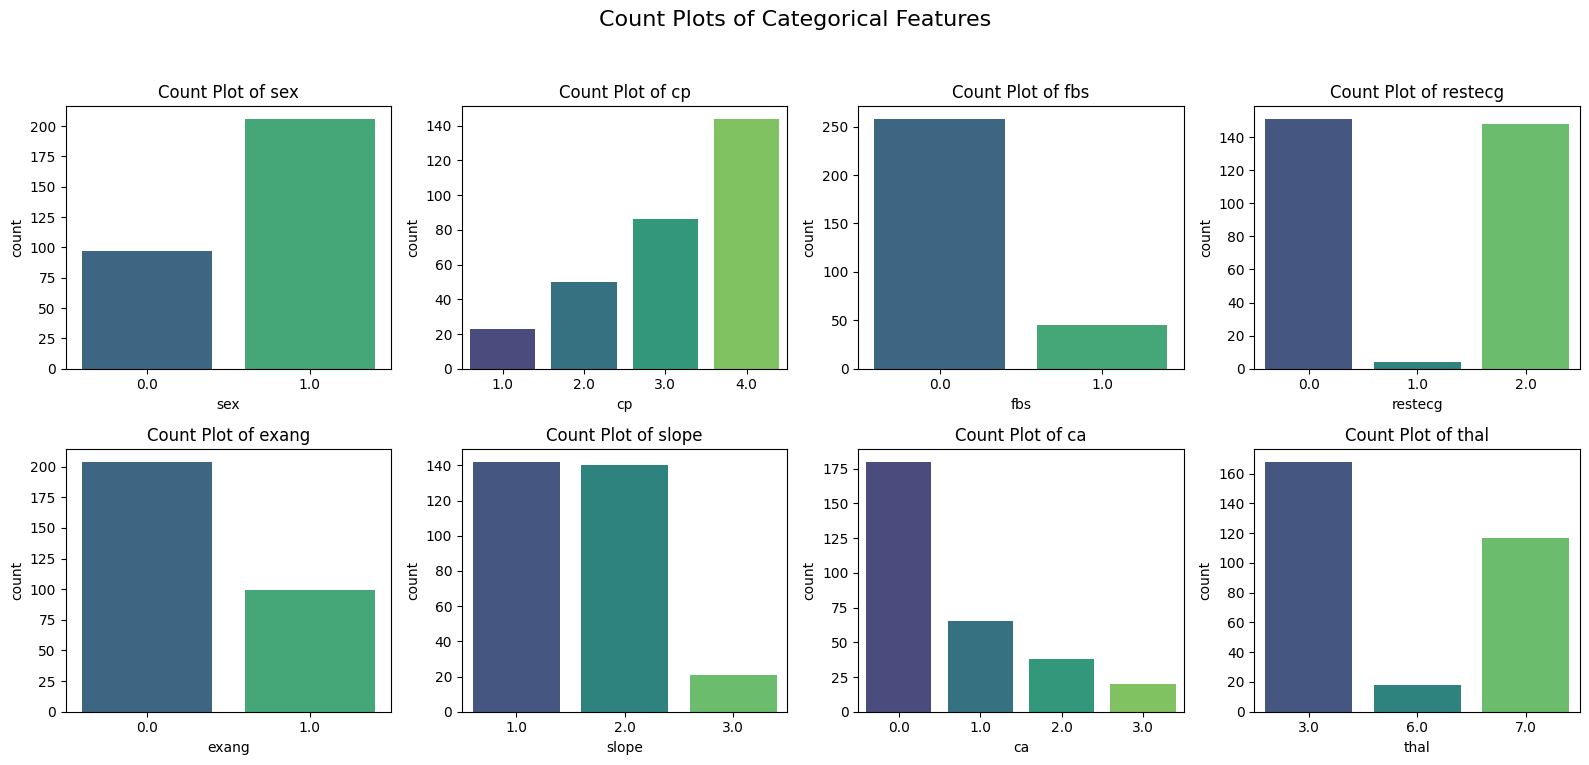

<ipython-input-1-642350884>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, ax=axes[i], palette='coolwarm')
<ipython-input-1-642350884>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, ax=axes[i], palette='coolwarm')
<ipython-input-1-642350884>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, ax=axes[i], palette='coolwarm')
<ipython-input-1-642350884>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

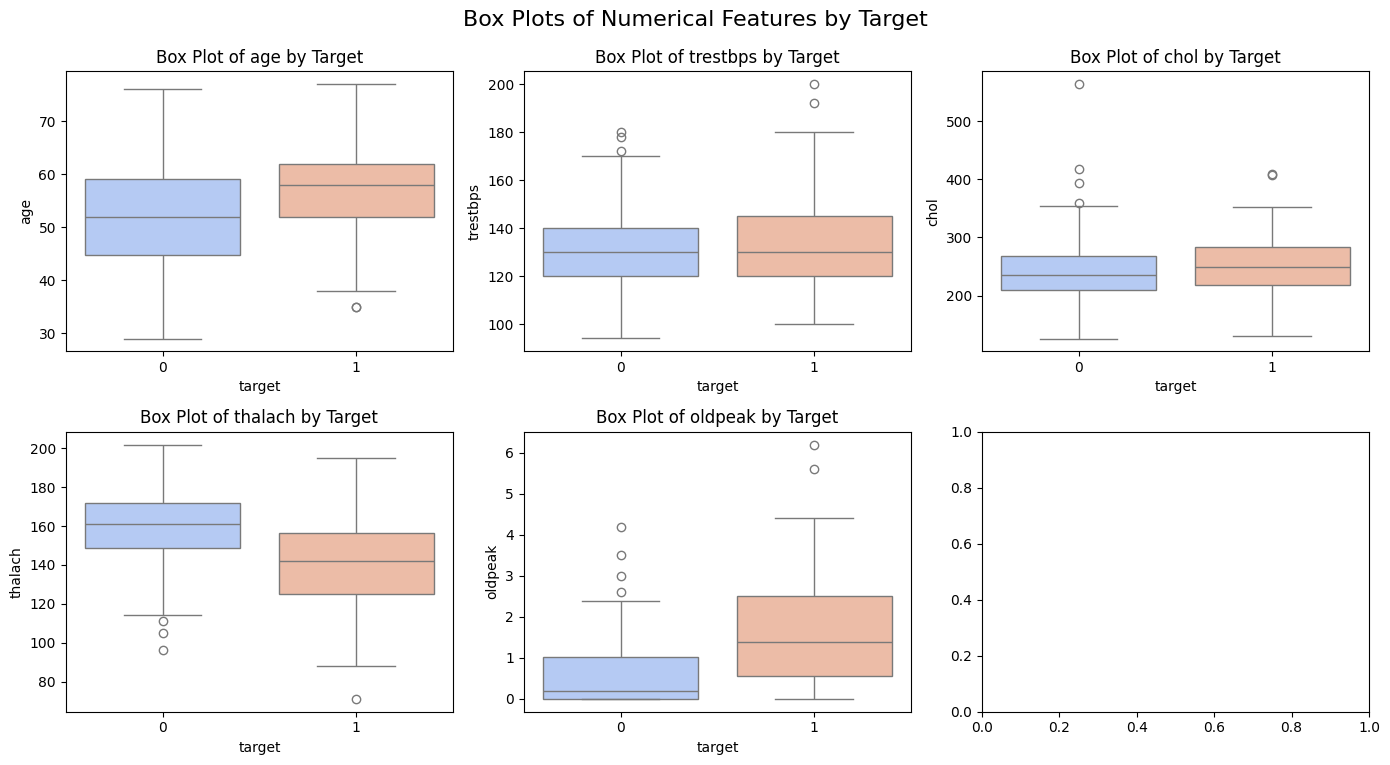

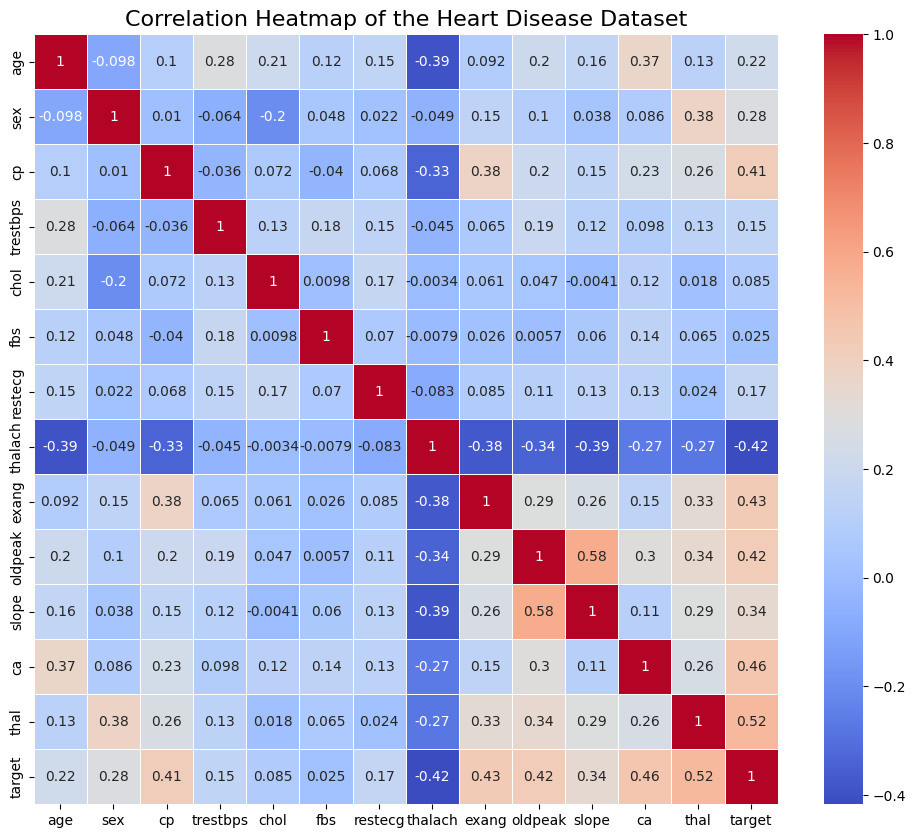

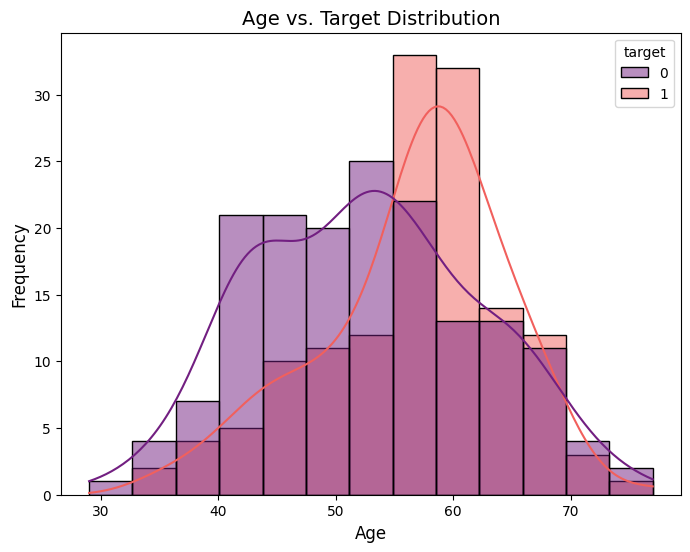

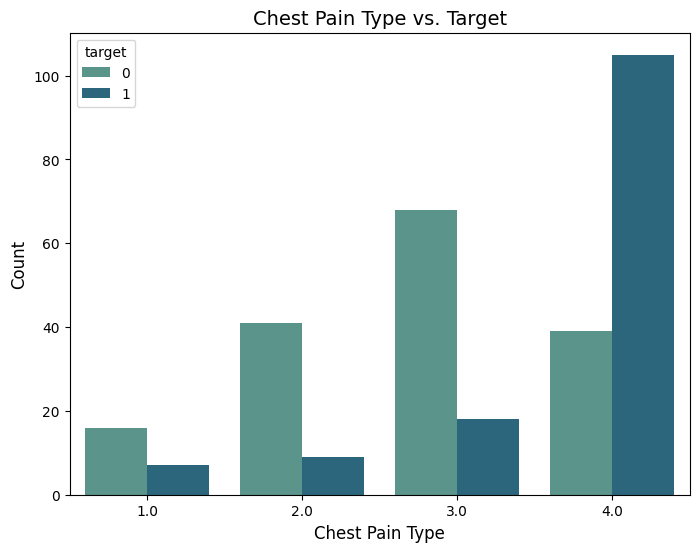

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a URL (replace with your actual data source)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Define column names (based on the dataset description)
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Read the data into a pandas DataFrame
df = pd.read_csv(url, names=column_names)

# Display the first few rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Replace any '?' values with NaN (handling missing data)
df = df.replace('?', np.nan)

# Convert columns 'ca' and 'thal' to numeric, coercing errors to NaN
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[['ca', 'thal']] = imputer.fit_transform(df[['ca', 'thal']])
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

# Drop rows with NaN values (for simplicity in this example)
df = df.dropna()

# Print data types and missing values
print("\nData Types and Missing Values:")
print(df.info())

# Basic Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Check the distribution of the target variable
print("\nTarget Variable Distribution:")
print(df['target'].value_counts())

# Convert target values to binary (0 or 1)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# --- Data Visualization ---

# Histograms for numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_features].skew()
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle
plt.show()

# Count plots for categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Count Plot of {feature}', fontsize=12)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.suptitle("Count Plots of Categorical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle
plt.show()

# Box plots to detect outliers
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='target', y=feature, data=df, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Box Plot of {feature} by Target', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle
plt.suptitle("Box Plots of Numerical Features by Target", fontsize=16)
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap of the Heart Disease Dataset", fontsize=16)
plt.show()

# --- More In-Depth Analysis (Examples) ---

# Example: Age vs. Target (Distribution)
plt.figure(figsize=(8, 6))
sns.histplot(x='age', hue='target', data=df, kde=True, palette='magma')
plt.title('Age vs. Target Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Example: Chest Pain Type vs. Target
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='target', data=df, palette='crest')
plt.title('Chest Pain Type vs. Target', fontsize=14)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [ ]:
# 1. Import necessary libraries for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Split data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# 3. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 6. Make predictions
y_pred = model.predict(X_test_scaled)

# 7. Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8852459016393442

Confusion Matrix:
 [[25  4]
 [ 3 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.8688524590163934


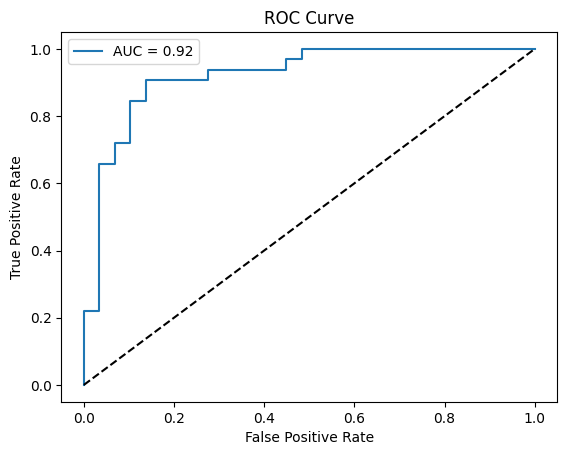

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()